In [148]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [18]:
# For converting excel columns to numerical index (from 0)
def col2num(col):
    num=0
    for c in col:
        if c in string.ascii_letters:
            num = num * 26 + (ord(c.upper()) - ord('A'))
    return num

In [119]:
test_values=pd.read_csv('data/Test Set Values.csv')
train_values=pd.read_csv('data/Training Set Values.csv')
train_labels=pd.read_csv('data/Training Set Labels.csv')

In [132]:
# Merge training values w labels 
train=pd.merge(train_labels, train_values, how='inner', on='id')
pd.Series(train.columns)

0                        id
1              status_group
2                amount_tsh
3             date_recorded
4                    funder
5                gps_height
6                 installer
7                 longitude
8                  latitude
9                  wpt_name
10              num_private
11                    basin
12               subvillage
13                   region
14              region_code
15            district_code
16                      lga
17                     ward
18               population
19           public_meeting
20              recorded_by
21        scheme_management
22              scheme_name
23                   permit
24        construction_year
25          extraction_type
26    extraction_type_group
27    extraction_type_class
28               management
29         management_group
30                  payment
31             payment_type
32            water_quality
33            quality_group
34                 quantity
35           quantit

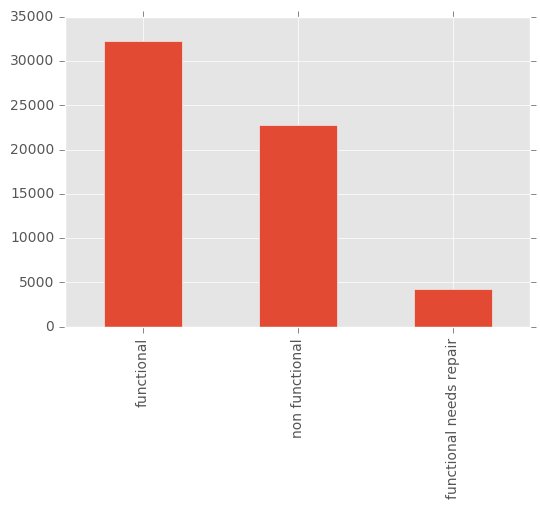

In [150]:
train['status_group'].value_counts().plot(kind="bar")
plt.show()

### Frequency Tables

In [189]:
# Frequency table divided by rows
def freq_tab(a,b):
    ft=pd.crosstab(index=a, columns=b, margins=True)
    return ft/ft.ix['All']

In [144]:
# Frequency Table Example: Permit
permit_ct=pd.crosstab(index=train["status_group"], columns=train["permit"], margins=True)
permit_ct/permit_ct.ix['All']

permit,False,True,All
status_group,,,
functional,0.517094,0.554437,0.542844
functional needs repair,0.075463,0.069417,0.071294
non functional,0.407443,0.376145,0.385862
All,1.000000,1.000000,1.000000


In [155]:
# Frequency Table for Quantity vs Status Group
quant_ct = pd.crosstab(index=train["quantity"], columns=train["status_group"], margins=True)
# To divide by row totals use df.div(rowtotal, axis=0)
quant_ct.div(quant_ct["All"], axis=0)

status_group,functional,functional needs repair,non functional,All
quantity,,,,
dry,0.025136,0.005924,0.968940,1.0
enough,0.652323,0.072320,0.275357,1.0
insufficient,0.523234,0.095842,0.380924,1.0
seasonal,0.574074,0.102716,0.323210,1.0
unknown,0.269962,0.017744,0.712294,1.0
All,0.543081,0.072677,0.384242,1.0


In [110]:
# Getting columns
extraction_type=train_values['extraction_type']
extraction_type_group=train_values['extraction_type_group']
quantity=train_values['quantity']
quantity_group=train_values['quantity_group']
source=train_values['source']
source_class=train_values['source_class']
source_type=train_values['source_type']
wpt=train_values['waterpoint_type']
wptg=train_values['waterpoint_type_group']

### Checking Unique Values

In [170]:
# Make a function to check unique values of columns:
def check_same(a, b):
    print('{} has {} unique values \n'.format(a.name, len(a.unique())))
    print('{} has {} unique values \n'.format(b.name, len(b.unique())))
    sym_diff=set(a)^set(b)
    print('{} elements in {} or {} but not both: \n {}'.format(len(sym_diff), a.name, b.name, sym_diff))
    check=a==b
    check_false=len(check[check==False])
    print('{pct:.{digits}f}% of elements are the same'.format(pct=100*(1-check_false/len(check)), digits=2))

In [ ]:
# check the check equals

##### Extraction Type, Group, Class

In [171]:
check_same(extraction_type,extraction_type_group)

extraction_type has 18 unique values 

extraction_type_group has 13 unique values 

13 elements in extraction_type or extraction_type_group but not both: 
 {'walimi', 'wind-powered', 'rope pump', 'other motorpump', 'other - swn 81', 'ksb', 'windmill', 'other - rope pump', 'other - play pump', 'cemo', 'climax', 'other - mkulima/shinyanga', 'other handpump'}
95.84% of elements are the same


In [172]:
check_same(train["extraction_type"], train["extraction_type_class"])

extraction_type has 18 unique values 

extraction_type_class has 7 unique values 

19 elements in extraction_type or extraction_type_class but not both: 
 {'afridev', 'swn 80', 'ksb', 'windmill', 'other - rope pump', 'other - play pump', 'cemo', 'climax', 'motorpump', 'handpump', 'wind-powered', 'india mark ii', 'nira/tanira', 'walimi', 'rope pump', 'other - swn 81', 'other - mkulima/shinyanga', 'india mark iii', 'mono'}
63.93% of elements are the same


In [173]:
check_same(train["extraction_type_class"], train["extraction_type_group"])

extraction_type_class has 7 unique values 

extraction_type_group has 13 unique values 

10 elements in extraction_type_class or extraction_type_group but not both: 
 {'afridev', 'other motorpump', 'swn 80', 'mono', 'motorpump', 'handpump', 'other handpump', 'india mark iii', 'india mark ii', 'nira/tanira'}
67.27% of elements are the same


In [192]:
freq_tab(train["extraction_type_class"], train["extraction_type_group"])

extraction_type_group,afridev,gravity,india mark ii,india mark iii,mono,nira/tanira,other,other handpump,other motorpump,rope pump,submersible,swn 80,wind-powered,All
extraction_type_class,,,,,,,,,,,,,,
gravity,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450842
handpump,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.277037
motorpump,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050286
other,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108249
rope pump,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.007593
submersible,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.104024
wind-powered,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001970
All,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


##### Quantity, Quantity Group

In [174]:
check_same(quantity, quantity_group)

quantity has 5 unique values 

quantity_group has 5 unique values 

0 elements in quantity or quantity_group but not both: 
 set()
100.00% of elements are the same


##### Source, Source Type, Source Class

In [175]:
check_same(source, source_type)

source has 10 unique values 

source_type has 7 unique values 

7 elements in source or source_type but not both: 
 {'river/lake', 'river', 'machine dbh', 'unknown', 'lake', 'hand dtw', 'borehole'}
62.30% of elements are the same


In [176]:
check_same(source, train["source_class"])

source has 10 unique values 

source_class has 3 unique values 

11 elements in source or source_class but not both: 
 {'surface', 'hand dtw', 'river', 'groundwater', 'shallow well', 'lake', 'machine dbh', 'dam', 'rainwater harvesting', 'spring', 'other'}
0.11% of elements are the same


In [177]:
check_same(train["source_class"], train["source_type"])

source_class has 3 unique values 

source_type has 7 unique values 

10 elements in source_class or source_type but not both: 
 {'borehole', 'groundwater', 'shallow well', 'surface', 'dam', 'spring', 'unknown', 'rainwater harvesting', 'river/lake', 'other'}
0.00% of elements are the same


In [188]:
# let's do a frequency table across source and source type
source_ct = pd.crosstab(index=train["source"], columns=train["source_type"], margins=True)
source_ct.div(source_ct["All"], axis=0).round(1)

source_type,borehole,dam,other,rainwater harvesting,river/lake,shallow well,spring,All
source,,,,,,,,
dam,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
hand dtw,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
lake,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
machine dbh,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
other,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
rainwater harvesting,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
river,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
shallow well,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
spring,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


##### Waterpoint Type, Waterpoint Type Group

In [178]:
check_same(wpt, wptg)

waterpoint_type has 7 unique values 

waterpoint_type_group has 6 unique values 

1 elements in waterpoint_type or waterpoint_type_group but not both: 
 {'communal standpipe multiple'}
89.73% of elements are the same


##### Payment, Payment Type

In [179]:
check_same(train["payment"], train["payment_type"])

payment has 7 unique values 

payment_type has 7 unique values 

8 elements in payment or payment_type but not both: 
 {'per bucket', 'on failure', 'monthly', 'annually', 'pay annually', 'pay when scheme fails', 'pay per bucket', 'pay monthly'}
58.18% of elements are the same


##### Region, Region Code

In [180]:
check_same(train["region"], train["region_code"])

region has 21 unique values 

region_code has 27 unique values 

48 elements in region or region_code but not both: 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 40, 'Singida', 'Shinyanga', 60, 'Mara', 'Ruvuma', 'Mwanza', 80, 'Tanga', 90, 'Pwani', 'Manyara', 'Tabora', 99, 'Lindi', 'Morogoro', 'Kagera', 'Arusha', 'Kilimanjaro', 'Rukwa', 'Dar es Salaam', 'Dodoma', 'Mtwara', 'Kigoma', 'Iringa', 'Mbeya'}
0.00% of elements are the same


In [118]:
# Number of unique values for each column [.unique vs .value_counts]
len_uniques = [len(train_values[i].unique()) for i in train_values.columns]
pd.DataFrame(len_uniques, index=train_values.columns, columns=['Unique Values'])

,Unique Values
id,59400
amount_tsh,98
date_recorded,356
funder,1898
gps_height,2428
installer,2146
longitude,57516
latitude,57517
wpt_name,37400
num_private,65


In [157]:
train["basin"].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani', 'Ruvuma / Southern Coast',
       'Internal', 'Lake Tanganyika', 'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)